In [ ]:
!rm -fr gesture_recognition/
!git clone https://github.com/usefulsensors/gesture_recognition.git

Cloning into 'gesture_recognition'...
remote: Enumerating objects: 92, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 92 (delta 12), reused 0 (delta 0), pack-reused 68
Unpacking objects: 100% (92/92), done.


In [ ]:
!pip install -q numpy opencv-python matplotlib tensorflow

In [ ]:
import cv2
import csv
import glob
import numpy as np
import tensorflow as tf

Input Image

(1836, 3264)


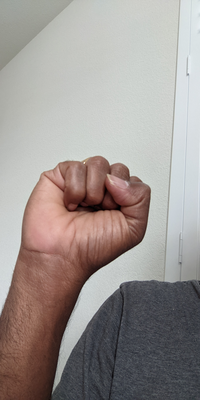

In [ ]:
import glob
import pandas as pd
import PIL
pd.set_option("display.precision", 3)
file = "/content/scroll_up.jpg"
print("Input Image\n")
image = PIL.Image.open(file)
#print(image.size)
INPUT_WIDTH = 200;
INPUT_HEIGHT = 400
input_image = image.resize((INPUT_WIDTH, INPUT_HEIGHT), PIL.Image.LANCZOS)
input_image

(2240, 393)


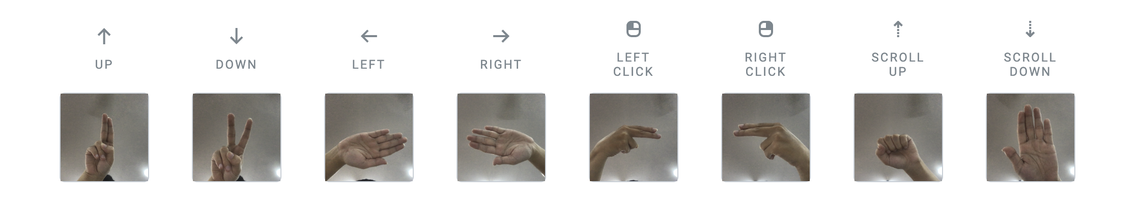

In [ ]:
IMAGE_PATH="/content/gesture_recognition/gesture_training_image.png"
image = PIL.Image.open(IMAGE_PATH)
#print(image.size)
image = image.resize((1140, 200), PIL.Image.LANCZOS)
image


In [ ]:
commands = ["up","down", "left", "right", "leftclick", "rightclick", "scroll up", "scroll down"]
interpreter = tf.lite.Interpreter(model_path="/content/gesture_recognition/model_metadata.tflite")
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
image = cv2.imread(file)
image = cv2.resize(image, (224, 224))
image = cv2.flip(image, 1)
#print(image.shape)
# Convert the BGR image to RGB before processing.
img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
img = np.expand_dims(img, axis = 0)/255.0
img = np.asarray(img, dtype = np.float32)
interpreter.set_tensor(input_details[0]['index'], img)
interpreter.invoke()

result = interpreter.get_tensor(output_details[0]['index'])
#print(result)
#print(np.argmax(result[0]))
tflite_pred_dataframe = pd.DataFrame(result)
tflite_pred_dataframe.columns = commands
print(tflite_pred_dataframe)
print("\n\n")
print("Result")
print(commands[np.argmax(result[0])])

      up   down   left  right  leftclick  rightclick  scroll up  scroll down
0  0.013  0.006  0.006  0.149      0.025       0.048      0.722        0.032



Result
scroll up
